###### Scraps

$$ a_i = \text{demand/weight/population at point } x_i $$

$$ p = \text{number of facilities to place}$$

$$
I = \text{set of demand sites} \\
    J = \text{set of facility sites} \\
    S_i = \text{distance beyond which demand site }i\text{ is considered uncovered} \\
    d_{ij} = \text{distance from demand site }i\text{ to facility site }j \\
 a_i = \text{demand/weight/population at point } x_i  \\
 p = \text{number of facilities to place}
$$

 

 \begin{equation}
  y_i=\left\{
  \begin{array}{@{}ll@{}}
    1 & \text{if demand site } i \text{ is NOT covered}\\
    0 & \text{otherwise}
  \end{array}\right.
\end{equation} 


 \begin{equation}
   x_j=\left\{
   \begin{array}{@{}11@{}}
     1 & \text{if facility is placed at site } j \\
     0 & \text{if not}
   \end{array}\right.
 \end{equation}

- number of facilities being added to the system as defined by $x_j$

 \begin{equation}
  e_j=\left\{
  \begin{array}{@{}ll@{}}
    1 & \text{if facility is NOT placed at site }j\\
    0 & \text{otherwise}
  \end{array}\right.
\end{equation} 


### Sets + Vars

 $$ I = \text{set of demand sites} \\ $$
  $$  J = \text{set of facility sites} \\ $$
   $$ S_i = \text{distance beyond which demand site }i\text{ is considered uncovered} \\ $$
   $$ d_{ij} = \text{distance from demand site }i\text{ to facility site }j \\ $$
 $$a_i = \text{demand/weight/population at point } x_i  \\ $$
 $$p = \text{number of facilities to place} $$

- $N_i$ is the covering set of $i$
- the set of $j$ that cover demand point $i$
$$ N_i = \{ \, j \in J \, | \, d_{ij} \leq S_i \} $$

### Binary Varables

 $$y_i = 1 \text{ if site i NOT covered, }0\text{ otherwise}$$
 $$x_j = 1 \text{ if facility placed at j, 0 otherwise}$$
 $$e_j = 1 \text{ if facility NOT placed at j, 0 otherwise}$$

$$\sum_{i\in I} a_i = S $$

$$\sum_{j=0}^{J} x_j \leq  p $$

- minimize the amount of demand that is *not* covered (because $ y_i = 0 $ when it *is* covered)

$$\text{(o1)}\;\;\;\;  \min \sum_{i\in I} y_i \, a_i $$

- minimize whatever you need to add to the cover to cover everything

$$\text{(o2)}\;\;\;\; \min\sum_{j\in J} e_j $$

### Constraints

 $$\text{(c1)}\;\;\;\; \sum_{j\in N_i} x_j + y_i \geq 1 \text{, } \; \forall i \in I $$

$$\text{(c2)}\;\;\;\; \sum_{j\in J} x_j = P $$ 

** this is the P facility constraint. (o2) with (c1) and (c2) is basically the max cover problem **

$$\text{(c3)}\;\;\;\; \sum_{j\in N_i} x_j + e_j \geq 1 \text{, } \; \forall i \in I $$

 \begin{equation}
  \text{(c4)}\;\;\;\; x_j=\left\{
  \begin{array}{@{}ll@{}}
    0 & \\
    1 &
  \end{array}\right.
\end{equation} 

 \begin{equation}
  \text{(c5)}\;\;\;\; e_j=\left\{
  \begin{array}{@{}ll@{}}
    0 & \\
    1 &
  \end{array}\right.
\end{equation} 

 $$\text{(c6)}\;\;\;\; y_i \geq 0$$

 

#### Unspecified,  but Implied

$$ x_j + e_j \text{ covers completely } \forall i \in I $$

# Original Code - SCIP example

In [1]:
from pyscipopt import Model, multidict, quicksum

In [2]:
import networkx
import matplotlib.pyplot as P

In [50]:
from numpy import arange

In [216]:
import cplex

In [3]:
#sample code below is from scipbook docs on Facility Location Problems
# http://scipbook.readthedocs.io/en/latest/flp.html

### The following loop find the covering set N

In [9]:
from math import sqrt

### lets try to alter this one piece at a time

###### Note:
Note that the x[i,j] var is CONTINOUS b/c its not explicitly restricted to being 0,1; i.e. it is a linear relaxation (and then we provide UB/ LBs for it)

In [366]:

def flpo(I,J,d,M,c):
    """flp -- model for the capacitated facility location problem
    Parameters:
        - I: set of customers
        - J: set of facilities
        - d[i]: demand for customer i
        - M[j]: capacity of facility j
        - c[i,j]: unit cost of servicing demand point i from facility j
    Returns a model, ready to be solved.
    """

    model = Model("flp")

    x,y = {},{}
    for j in J: # FACILITIES
        x[j] = model.addVar(vtype="B", name="y(%s)"%j) 
    for i in I: # CUSTOMERS
        y[i] = model.addVar(vtype="C", name="x(%s)"%i)

    #for i in I:
    #    model.addCons(quicksum(x[i,j] for j in J) == d[i], "Demand(%s)"%i)

    #for j in M: # this is what keeps the uncapacitated problem from being too hard to solve (i.e. it is the strong formulation)
    #    model.addCons(quicksum(x[i,j] for i in I) <= M[j]*y[j], "Capacity(%s)"%i)

    #for (i,j) in x:
    #    model.addCons(x[i,j] <= d[i]*y[j], "Strong(%s,%s)"%(i,j))

    N= {1:[], 2:[2], 3:[2], 4:[1,3], 5:[3], 6:[2,3], 7:[1,2,3]}
    
    #ADDED
    for i in I:
        model.addCons(quicksum(x[j] for j in N[i])+y[i] >= 1)
    
    for i in I:
        model.addCons(y[i] >= 0)
    
    P = 2
    model.addCons(quicksum(x[j] for j in J) == P)
    
    model.setObjective(
        #quicksum(f[j]*y[j] for j in J) +
        #quicksum(c[i,j]*x[i,j] for i in I for j in J),
        quicksum(y[i]*d[i] for i in I),
        "minimize")
    model.data = x,y

    return model



In [367]:
def make_datao():
    I,d = multidict({1:12, 2:5, 3:6, 4:3, 5:9, 6:1, 7:10})            # demand
    J,M = multidict({1:[500], 2:[500], 3:[500]}) # capacity, fixed costs
    c = {(1,1):4,  (1,2):6,  (1,3):9,    # distance cost to get from demand point i to 
         (2,1):5,  (2,2):0.7,  (2,3):7,   # potl facility site j (i,j):distance
         (3,1):6,  (3,2):3,  (3,3):4,
         (4,1):0.5,  (4,2):5,  (4,3):3,
         (5,1):10, (5,2):8,  (5,3):0.86,
         (6,1):9,  (6,2):0.8,  (6,3):0.7,
         (7,1):2.5,  (7,2):2.5,  (7,3):1.3,
         }
    return I,J,d,M,c


('Optimal value:', 12.0)
('Facilities at nodes:', [2, 3])
('Customers Covered:', [2, 3, 4, 5, 6, 7])
1
6


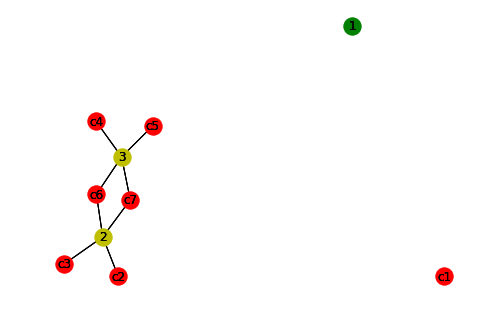

In [368]:
if __name__ == "__main__":
    I,J,d,M,c = make_datao()
    model = flpo(I,J,d,M,c)
    model.hideOutput(quiet=False)
    model.optimize()

    EPS = 1.e-6
    x,y = model.data
    uncovered_customers = [i for i in y if model.getVal(y[i]) > EPS]
    # ADDED:
    # remember, we need to switch this b/c y==1 means its NOT covered in our model
    covered_customers = [i for i in y if i not in uncovered_customers]
    facilities = [j for j in x if model.getVal(x[j]) > EPS]

    print("Optimal value:", model.getObjVal())
    print("Facilities at nodes:", facilities)
    print("Customers Covered:", covered_customers)

    # ADDED now alter this so that it connects customers to who they are covered by
    try: # plot the result using networkx and matplotlib
        import networkx as NX
        import matplotlib.pyplot as P
        P.clf()
        G = NX.Graph()
        
        uncovered_customers = [i for i in y if i not in covered_customers]
        other = [j for j in x if j not in facilities]
        customers = ["c%s"%i for i in d]
        G.add_nodes_from(facilities)
        G.add_nodes_from(other)
        G.add_nodes_from(customers)
        for i in N:
            to_nodes = N[i]
            for n in to_nodes:
                if n in facilities:
                    G.add_edge("c%s"%i,n)
            
        print len(uncovered_customers)
        print len(covered_customers)
        
        position = NX.drawing.layout.spring_layout(G)
        NX.draw(G,position,node_color="y",nodelist=facilities, with_labels=True)
        NX.draw(G,position,node_color="g",nodelist=other, with_labels=True)
        NX.draw(G,position,node_color="r",nodelist=customers, with_labels=True)
        P.show()
    except ImportError:
        print("install 'networkx' and 'matplotlib' for plotting")

In [362]:
print G.nodes
print G.edges

[1, 2, 3, 'c3', 'c2', 'c1', 'c7', 'c6', 'c5', 'c4']
[(1, 'c7'), (1, 'c4'), (2, 'c3'), (2, 'c2'), (2, 'c7'), (2, 'c6'), (3, 'c7'), (3, 'c6'), (3, 'c5'), (3, 'c4')]


In [337]:
N= {1:[], 2:[2], 3:[2], 4:[1,3], 5:[3], 6:[2,3], 7:[1,2,3]}

for i in I:
        print quicksum(x[j] for j in N[i])+y[i]
    

Expr({Term(): 0.0, Term(x(1)): 1.0})
Expr({Term(): 0.0, Term(y(2)): 1.0, Term(x(2)): 1.0})
Expr({Term(): 0.0, Term(y(2)): 1.0, Term(x(3)): 1.0})
Expr({Term(): 0.0, Term(y(1)): 1.0, Term(y(3)): 1.0, Term(x(4)): 1.0})
Expr({Term(): 0.0, Term(y(3)): 1.0, Term(x(5)): 1.0})
Expr({Term(): 0.0, Term(y(2)): 1.0, Term(y(3)): 1.0, Term(x(6)): 1.0})
Expr({Term(): 0.0, Term(y(1)): 1.0, Term(y(3)): 1.0, Term(y(2)): 1.0, Term(x(7)): 1.0})


In [332]:
N[6]

[1, 2, 3]

In [338]:
for i in I:
    print i
    print N[i]

1
[]
2
[2]
3
[2]
4
[1, 3]
5
[3]
6
[2, 3]
7
[1, 2, 3]


In [334]:
y[7]

x(7)

In [353]:
print ["c%s"%i for i in d]

['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7']
